# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Data

In [2]:
data = pd.read_csv('Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
data.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14424 entries, 0 to 14423
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   14424 non-null  int64  
 1   Accident_Index                               14424 non-null  object 
 2   Location_Easting_OSGR                        14424 non-null  float64
 3   Location_Northing_OSGR                       14424 non-null  float64
 4   Longitude                                    14424 non-null  float64
 5   Latitude                                     14424 non-null  float64
 6   Police_Force                                 14424 non-null  int64  
 7   Accident_Severity                            14424 non-null  int64  
 8   Number_of_Vehicles                           14203 non-null  float64
 9   Number_of_Casualties                         14424 non-null  int64  
 10

In [5]:
data = data.loc[:,['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Police_Force','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Date','Day_of_Week','Speed_limit','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area','Year']]

In [6]:
#Calculate missing values

total = data.isnull().sum().sort_values(ascending=False)
precent = round(data.isnull().sum()/ data.isnull().count() *100, 1)
types = data.dtypes
missing_values = pd.concat([total,precent,types], axis=1, keys=['Total','%','type'])

#show columns with missing values and their precent

missing_values[missing_values['Total'] != 0]

,Total,%,type
Speed_limit,289,2.0,float64
Number_of_Vehicles,221,1.5,float64
Day_of_Week,132,0.9,float64
Weather_Conditions,1,0.0,object
Road_Surface_Conditions,1,0.0,object
Urban_or_Rural_Area,1,0.0,float64
Year,1,0.0,float64


In [7]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,14424.0,NaN,NaN,NaN,438390.058236,66143.317817,296780.0,387462.5,428660.0,513642.5,558550.0
Location_Northing_OSGR,14424.0,NaN,NaN,NaN,340681.094703,115649.541159,156110.0,223550.0,364655.0,416750.0,655260.0
Longitude,14424.0,NaN,NaN,NaN,-1.444135,0.967281,-3.596752,-2.18875,-1.56448,-0.344573,0.34888
Latitude,14424.0,NaN,NaN,NaN,52.958108,1.044008,51.28906,51.909117,53.173144,53.644977,55.790657
Police_Force,14424.0,NaN,NaN,NaN,11.221575,9.559978,1.0,3.0,10.0,20.0,48.0
Accident_Severity,14424.0,NaN,NaN,NaN,2.850943,0.388913,1.0,3.0,3.0,3.0,3.0
Number_of_Vehicles,14203.0,NaN,NaN,NaN,1.834894,0.69712,1.0,1.0,2.0,2.0,18.0
Number_of_Casualties,14424.0,NaN,NaN,NaN,1.357598,0.798299,1.0,1.0,1.0,1.0,13.0
Date,14424,365,21/10/2005,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_Week,14292.0,NaN,NaN,NaN,4.124265,1.930268,1.0,2.0,4.0,6.0,7.0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

<Axes: >

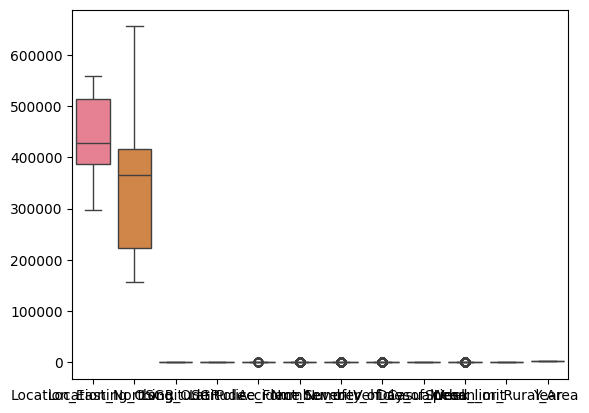

In [8]:
#check for outliers

sns.boxplot(data)

# As shown data are having no outliers, no need for processing

In [9]:
# Impute missing values for ['Weather_Conditions', 'Road_Surface_Conditions'] with most frequent.
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy='most_frequent')

for col in data.select_dtypes('object').columns[1:]:
  data[col] = pd.DataFrame(imputer_cat.fit_transform(data[[col]]))

In [10]:
# Impute missing values for numarical with median.

imputer_num = SimpleImputer(strategy='median')

for col in data.select_dtypes('number').columns:
  data[col] = pd.DataFrame(imputer_num.fit_transform(data[[col]]))

In [11]:
#Check missing values

data.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [12]:
#encode categorical values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in data.select_dtypes('object').columns[1:]:
  data[col] = pd.DataFrame(encoder.fit_transform(data[[col]]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#Scale Numerical values
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

for col in data.select_dtypes('number').columns:
  data[col] = pd.DataFrame(scaler.fit_transform(data[[col]]))

In [14]:
#Reduce dimentions using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

date_pca = data.drop(columns='Date')

data_pca = pca.fit_transform(date_pca)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Location_Easting_OSGR', ylabel='Location_Northing_OSGR'>

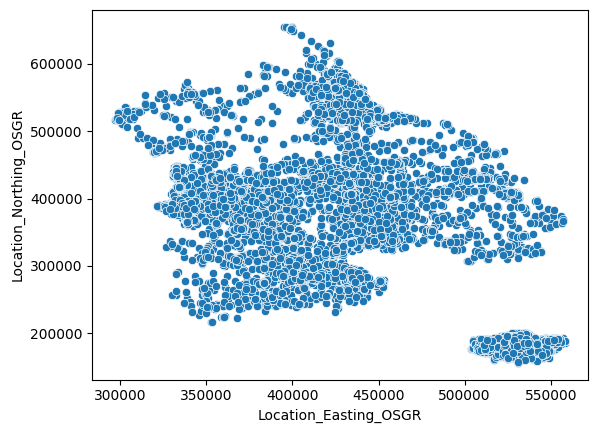

In [14]:
sns.scatterplot(data=data, x='Location_Easting_OSGR',y='Location_Northing_OSGR')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

km.fit(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
labels = km.labels_

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

<Axes: >

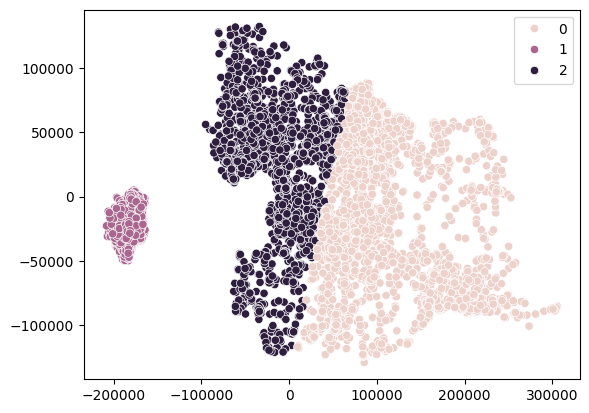

In [26]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels)

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?